# Data preparation

In [2]:
# get required packages
import pandas as pd
import numpy as np
import json
import gzip
from IPython.display import display
from PIL import Image
import requests
from io import BytesIO


In [4]:
# folder path to meta dataset
fp_meta = r"AMAZON_FASHION_5core_meta.json.gz"      # 5-core metadata
fp_review = r"reviews_AMAZON_FASHION.csv.gz"        # reviews data
fp_test = r"meta_AMAZON_FASHION.json"            # original metadata (IGNORE THIS)


# functions to read json file and convert into pandas dataframe
def parse_gz_jsonl(path):
    with gzip.open(path, "rt", encoding="utf-8") as f:
        for line in f:
            yield json.loads(line.strip())

def getDF_jsonl_gz(path):
    data_list = list(parse_gz_jsonl(path))
    return pd.DataFrame(data_list)


data1 = getDF_jsonl_gz(fp_meta)             # 5-core metadata
data2 = pd.read_csv(fp_review)              # reviews data
test = pd.read_json(fp_test, lines=True)    # original metadata


In [ ]:
# preview the 5core fashion dataframe
data1

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3171,5.0,True,"07 2, 2018",A2077NII5H62R2,B005AGO4LU,"{'Size:': ' 8.5 B(M) US', 'Color:': ' Green Gl...",Amazon Customer,Perfect fit!,Five Stars,1530489600,NaN,NaN
3172,5.0,True,"06 28, 2018",A2IBS6PIPAGAB5,B005AGO4LU,"{'Size:': ' 5 B(M) US', 'Color:': ' Wolf Grey/...",J. Avila,My favorite cross trainers!,Comfortable,1530144000,NaN,NaN
3173,5.0,True,"06 25, 2018",A1GTC5EVSJNCQ8,B005AGO4LU,"{'Size:': ' 8 B(M) US', 'Color:': ' Blue Tint/...",Amazon Customer,Love them fit perfect,Five Stars,1529884800,NaN,NaN
3174,5.0,True,"06 20, 2018",A311XHHLM12MUT,B005AGO4LU,"{'Size:': ' 9 B(M) US', 'Color:': ' Blue Tint/...",Peter,Favorite Nike shoe ever! The flex sole is exce...,Love them!,1529452800,NaN,NaN


In [5]:
# preview the original fashion dataframe
test

,title,brand,feature,rank,date,asin,imageURL,imageURLHighRes,description,price,also_view,also_buy,fit,details,similar_item,tech1
0,Slime Time Fall Fest [With CDROM and Collector...,Group Publishing (CO),[Product Dimensions:\n \n8....,"13,052,976inClothing,Shoesamp;Jewelry(",8.70 inches,0764443682,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XCC Qi promise new spider snake preparing men'...,NaN,NaN,"11,654,581inClothing,Shoesamp;Jewelry(",5 star,1291691480,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Magical Things I Really Do Do Too!,Christopher Manos,[Package Dimensions:\n \n8....,"19,308,073inClothing,ShoesJewelry(",5 star,1940280001,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[For the professional or amateur magician. Ro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ashes to Ashes, Oranges to Oranges",Flickerlamp Publishing,[Package Dimensions:\n \n8....,"19,734,184inClothing,ShoesJewelry(",5 star,1940735033,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aether & Empire #1 - 2016 First Printing Comic...,NaN,[Package Dimensions:\n \n10...,"10,558,646inClothing,Shoesamp;Jewelry(",5 star,1940967805,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,$4.50,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186632,JT Women's Elegant Off Shoulder Chiffon Maxi L...,JT,NaN,"9,835,890inClothing,ShoesJewelry(",5 star,B01HJGXL4O,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186633,Microcosm Retro Vintage Black Crochet Lace One...,Microcosm,[Package Dimensions:\n \n7....,"11,390,771inClothing,ShoesJewelry(",5 star5 star (0%),B01HJHF97K,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186634,Lookatool Classic Plain Vintage Army Military ...,Lookatool,"[Cotton+Polyester, Imported, Item type:Basebal...","972,275inClothing,ShoesJewelry(",5 star,B01HJGJ9LS,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,$8.53,"[B00XLECZMS, B0018MQAOY, B00N833I4Q, B074DQSPP...","[B07BHQ1FXL, B00XLECZMS, B07CJWM5WY, B07CS97C1...","class=""a-normal a-align-center a-spacing-smal...",NaN,NaN,NaN
186635,Edith Windsor Women's Deep V-neck Beaded Sequi...,Edith Windsor,[Product Dimensions:\n \n9....,"1,964,585inClothing,ShoesJewelry(",5 star,B01HJHTH5U,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,[B077ZLGMJ3],NaN,NaN,NaN,NaN


In [7]:
# col names for original metadata
headers = list(test.columns)
print(headers)

# col names for 5-core metadata
headers = list(data1.columns)
print(headers)

['title', 'brand', 'feature', 'rank', 'date', 'asin', 'imageURL', 'imageURLHighRes', 'description', 'price', 'also_view', 'also_buy', 'fit', 'details', 'similar_item', 'tech1']
['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote', 'image']


In [ ]:
# check for duplicates in original metadata
nrows = len(test['asin'].unique())
print(f"There are {nrows} unique 'asin' in test dataframe")
print(f"There are {test.shape[0]} total rows in test dataframe")

if nrows == test.shape[0]:
    print("No duplicates product IDs")
else:
    print("Duplicates of product IDs exist")

print("")

# check for duplicates in 5-core metadata
nrows = len(data1['asin'].unique())
print(f"There are {nrows} unique 'asin' in 5core dataframe")
print(f"There are {data1.shape[0]} total rows in 5core dataframe")

if nrows == data1.shape[0]:
    print("No duplicates product IDs in 5core")
else:
    print("Duplicates of product IDs exist in 5core")

There are 186194 unique 'asin' in test dataframe
There are 186637 total rows in test dataframe
Duplicates of product IDs exist

There are 31 unique 'asin' in 5core dataframe
There are 3176 total rows in 5core dataframe
Duplicates of product IDs exist in 5core


In [11]:
# create a separate table for image links, with original 'images' column pivoted out into different image types for each row of data
links = test["imageURLHighRes"].explode()
images = pd.DataFrame(test['asin']).join(links)

# preview images dataframe
images

,asin,imageURLHighRes
0,0764443682,https://images-na.ssl-images-amazon.com/images...
1,1291691480,https://images-na.ssl-images-amazon.com/images...
1,1291691480,https://images-na.ssl-images-amazon.com/images...
1,1291691480,https://images-na.ssl-images-amazon.com/images...
2,1940280001,https://images-na.ssl-images-amazon.com/images...
...,...,...
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images...
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images...
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images...
186635,B01HJHTH5U,https://images-na.ssl-images-amazon.com/images...


### Sample of images from 5-core metadata, and first 10 original metadata

There are 21 unique image links in 5core metadata
https://images-na.ssl-images-amazon.com/images/I/71MxdEmUNpL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/61ifu-JvzQL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/61nv8h45pHL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/71mOYBlBnAL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/619NiK+tIRL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/81RTR7fHytL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/71Q1TDIUL6L._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/81-b35fKqUL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/716r65w8StL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/714tarywrwL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/718Y-qb+NUL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/81mJY5XtKRL._SY88.jpg
https://images-na.ssl-images-amazon.com/images/I/71v+pR+F9YL._SY88.jpg
https://images-na.ssl-image

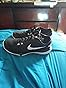

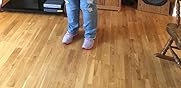

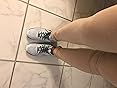

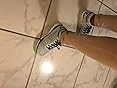

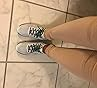

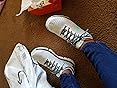

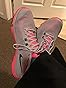

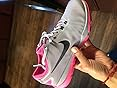

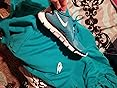

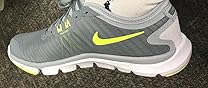

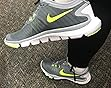

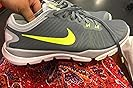

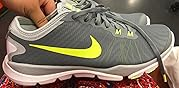

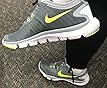

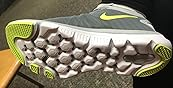

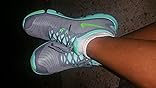

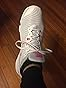

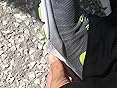

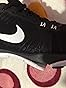

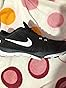

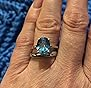

In [28]:
# get unique image links
image_links = data1['image'].drop_duplicates()
image_links = image_links.explode()[1:]   # the first image link is NA
print(f"There are {len(image_links)} unique image links in 5core metadata")

# check unique images urls
for url in image_links:
    print(url, flush=True)

# preview unique images available in dataset
for url in image_links:
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    display(image)

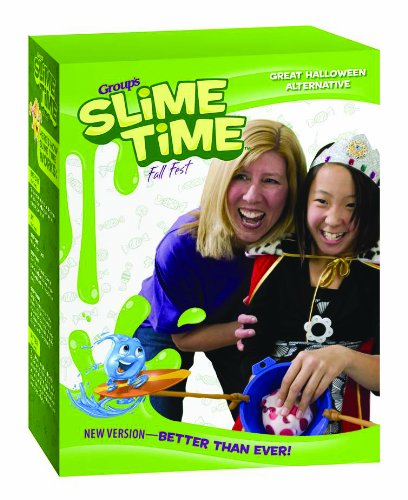

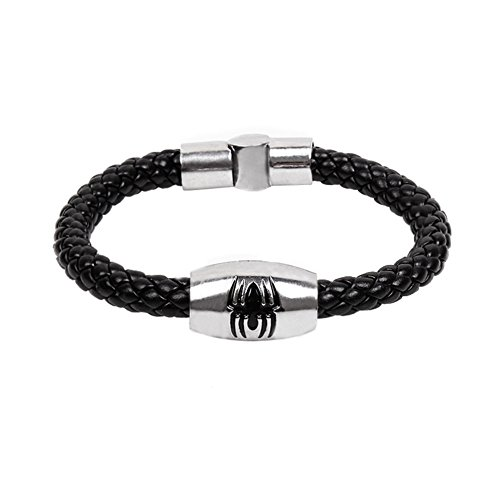

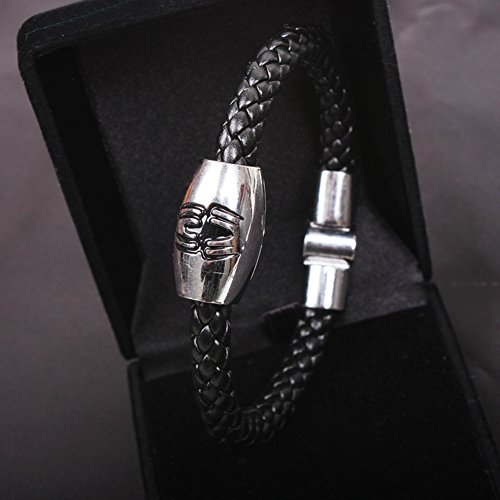

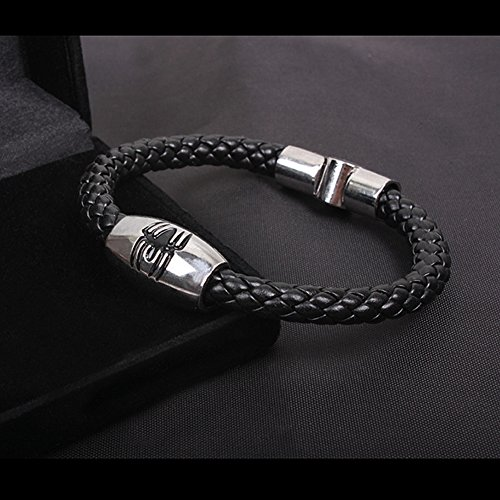

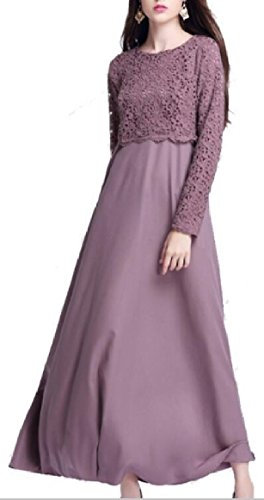

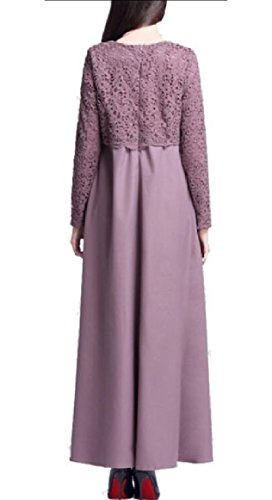

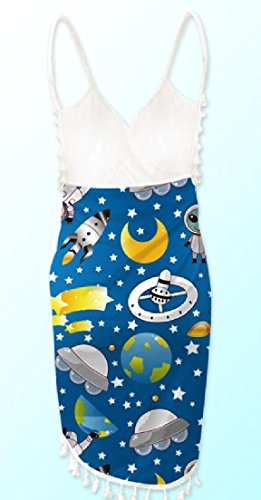

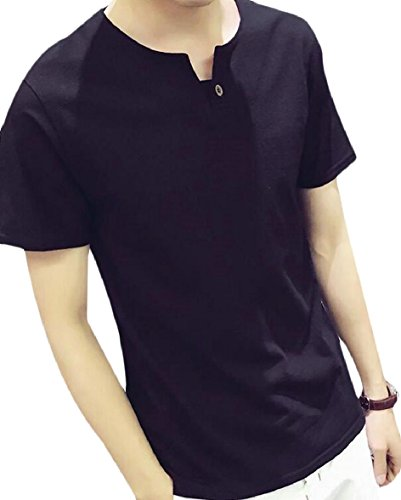

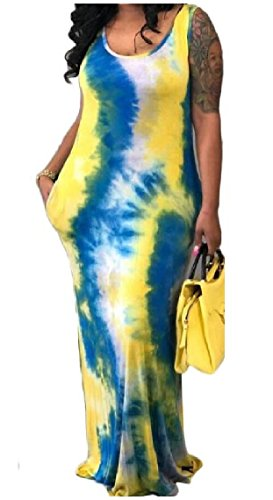

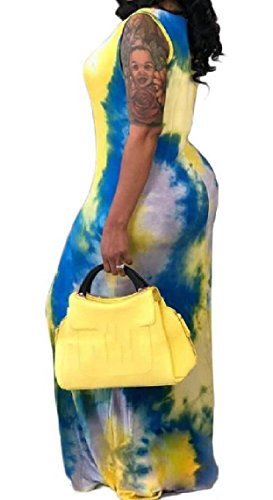

In [29]:
for url in images['imageURLHighRes'][:10]:
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    display(image)